<a href="https://colab.research.google.com/github/yudenio/1/blob/main/arbol_de_clasificacion_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:#3D6AF2; text-align: center;">CLASSIFICATION TREES - ÁRBOLES DE CLASIFICACIÓN</span>

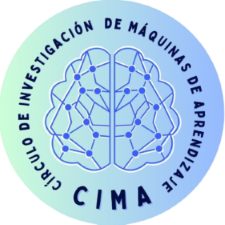

### <span style="color:#486CD9; text-align: center;">Alumno: Yudenio Bermudez Huayhua</span>

<p>
        Los <strong>árboles de clasificación</strong> son un tipo de modelo de aprendizaje supervisado que organiza los datos en una estructura jerárquica de decisiones basada en reglas.
        Utilizan criterios como el <em>índice de Gini</em> o la <em>entropía</em> para dividir iterativamente los datos en subconjuntos más homogéneos hasta que cada nodo hoja
        contenga instancias predominantemente de una misma clase. Son fáciles de interpretar y manejar tanto variables categóricas como numéricas, pero pueden sobreajustarse
        si no se podan adecuadamente. Para mejorar su rendimiento, se utilizan métodos como <strong>Random Forest</strong> o <strong>XGBoost</strong>, que combinan múltiples
        árboles para aumentar la precisión y la generalización del modelo.
    </p>

##  <span style="color:#3D6AF2; text-align: center;">Caso de estudio</span>

<p style="font-size: 16px;"> En este caso, aplicaremos un árbol de clasificación al conjunto de datos Spotify Dataset 1921-2020, 160k+ Tracks, que contiene información de más de 160,000 canciones lanzadas entre 1921 y 2020, con características de audio como tempo, energía, valencia, entre otras. El objetivo del modelo será predecir si una canción tiene contenido explícito o no, utilizando las características musicales como predictores. Este análisis permitirá comprender qué atributos están más correlacionados con la presencia de contenido explícito en la música.


[Datos disponibles aquí](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks/data)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")

print("Path to dataset files:", path)

100%|██████████| 16.5M/16.5M [00:00<00:00, 79.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks/versions/1


In [ ]:
# Construye la ruta completa al archivo CSV
file_path = os.path.join(path, 'data.csv')

# Abre el archivo en modo lectura ('r')
with open(file_path, 'r') as file:
  # Lee todas las líneas del archivo
  lines = file.readlines()

  # Procesa las líneas (ejemplo: imprime las primeras 5)
  for i in range(5):
    print(lines[i])

# Lee el archivo CSV con pandas
df = pd.read_csv(file_path)
df.head()

valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo

0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",4,1921,0.0366,80.954

0.963,1921,0.732,['Dennis Day'],0.8190000000000001,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.0,7,0.16,-12.441,1,Clancy Lowered the Boom,5,1921,0.415,60.93600000000001

0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat'],0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.85,1,Gati Bali,5,1921,0.0339,110.339

0.165,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,2.77e-05,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109



,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
# Lectura de datos
data = df
print(data.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

In [ ]:
# Verificar valores nulos
print(data.isnull().sum())

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


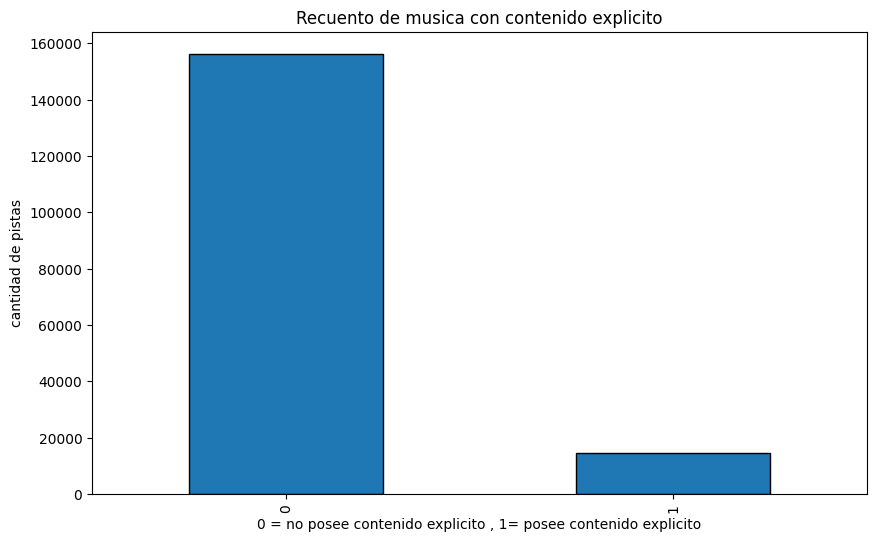

In [ ]:
# Gráfico de barras para el recuento de musica con contenido explicito o no
plt.figure(figsize=(10, 6))
data['explicit'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recuento de musica con contenido explicito')
plt.xlabel('0 = no posee contenido explicito , 1= posee contenido explicito')
plt.ylabel('cantidad de pistas')
plt.show()

In [ ]:
data['explicit'].value_counts()

,count
explicit,
0,156220
1,14433


<p style="font-size: 16px;"> Las clases 'normal' y 'cell_line' están subrepresentadas en el conjunto de datos y generan un desbalance significativo

In [ ]:
# Separar características (variables predictoras) y etiqueta (valor target)
X = data.drop(columns=["id", "explicit", "name","artists","release_date"])  # Elimina la columna irrelevante, "id"
y = data["explicit"]

In [ ]:
print(X.dtypes)

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
dtype: object


In [ ]:
# División de los datos en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  <span style="color:#3D6AF2; text-align: center;">Crear y entrenar el modelo</span>

In [ ]:
# CreaR el modelo
clf = DecisionTreeClassifier(random_state=42, criterion='gini')

<p style="font-size: 16px;">
<strong>criterion='gini':</strong>    Define el criterio de evaluación de las divisiones en el árbol. Se utiliza el índice de Gini, una medida de pureza que ayuda a seleccionar la mejor división en cada nodo del árbol. Alternativamente, se podría usar 'entropy' para el cálculo de la ganancia de información.

In [ ]:
# Entrenamiento del modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<p style="font-size: 16px;">
Durante el entrenamiento, el modelo aprende a dividir los datos basándose en las características de X_train y los valores de y_train, optimizando la estructura del árbol de decisión para realizar predicciones sobre nuevos datos con características similares.

###  <span style="color:#3D6AF2; text-align: center;">Predicciones y cálculo de precisión</span>

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test) # predicciones sobre el conjunto de prueba (X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.3f}")

Precisión del modelo: 0.935


###  <span style="color:#3D6AF2; text-align: center;">Informe de clasificación y matriz de confusión</span>

In [ ]:
# Generar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     46805
           1       0.62      0.63      0.62      4391

    accuracy                           0.93     51196
   macro avg       0.79      0.79      0.79     51196
weighted avg       0.94      0.93      0.93     51196



### **1. Clases en el informe**
- **Clase 0:** Canciones sin contenido explícito (mayoría en los datos, **46,885 muestras**).
- **Clase 1:** Canciones con contenido explícito (**4,391 muestras**).

---

### **2. Métricas clave**
#### **Precisión (`precision`)**
- Mide qué proporción de las predicciones positivas fueron correctas.
- **Clase 0:** 96% → El 96% de las canciones predichas como "no explícitas" realmente no lo son.
- **Clase 1:** 62% → El 62% de las canciones predichas como "explícitas" realmente lo son.
- **Interpretación:** El modelo tiene un alto desempeño para detectar canciones **no explícitas**, pero es menos preciso al identificar correctamente las **explícitas**.

#### **Recall (`recall`)**
- Mide qué proporción de los casos reales fueron correctamente identificados.
- **Clase 0:** 96% → De todas las canciones realmente "no explícitas", el modelo identificó correctamente el 96%.
- **Clase 1:** 63% → De todas las canciones realmente "explícitas", el modelo solo identificó correctamente el 63%.
- **Interpretación:** El modelo es bastante bueno para capturar la mayoría de las canciones **no explícitas**, pero omite un 37% de las canciones realmente **explícitas**.

#### **F1-score (`f1-score`)**
- Es una combinación de precisión y recall, útil cuando hay desbalance de clases.
- **Clase 0:** 96%
- **Clase 1:** 62%
- **Interpretación:** La clase **"explícito" (1) tiene un F1-score bajo (62%)**, lo que indica que el modelo tiene dificultades para identificar correctamente este grupo.

---

### **3. Promedios y Exactitud Global**
- **Exactitud (`accuracy`)**: **93%**
  - Significa que, en general, el modelo clasificó correctamente el 93% de todas las canciones.
- **Macro Avg (promedio simple de clases):** **79%**
  - Promedio de precisión, recall y F1-score de ambas clases sin considerar desbalance.
- **Weighted Avg (ponderado por frecuencia de clases):** **94%**
  - Promedio ajustado al desbalance de datos (más canciones no explícitas).



In [ ]:
# matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[45102  1703]
 [ 1644  2747]]


### **1. Estructura de la Matriz**
Donde:
- **Filas:** Representan las etiquetas reales (valores verdaderos).
- **Columnas:** Representan las predicciones del modelo.
- **Elementos:**
  - **45102 (Verdaderos Negativos - TN):**  
    Canciones correctamente clasificadas como **"no explícitas"**.
  - **1703 (Falsos Positivos - FP):**  
    Canciones **no explícitas** que el modelo clasificó erróneamente como **explícitas**.
  - **1644 (Falsos Negativos - FN):**  
    Canciones **explícitas** que el modelo clasificó erróneamente como **no explícitas**.
  - **2747 (Verdaderos Positivos - TP):**  
    Canciones correctamente clasificadas como **"explícitas"**.

---

### **2. Interpretación de los Errores**
- **El modelo predice bien las canciones "no explícitas" (45102 aciertos).**
- **Comete errores en la detección de canciones "explícitas":**
  - **1,644 canciones explícitas fueron clasificadas como no explícitas** (*falsos negativos*).  
  - **1,703 canciones no explícitas fueron clasificadas como explícitas** (*falsos positivos*).

Este patrón concuerda con el **recall bajo** en la clase explícita (63%), lo que significa que **el modelo deja pasar muchas canciones explícitas sin detectarlas**.



###  <span style="color:#3D6AF2; text-align: center;"> Visualización el árbol de decisión</span>

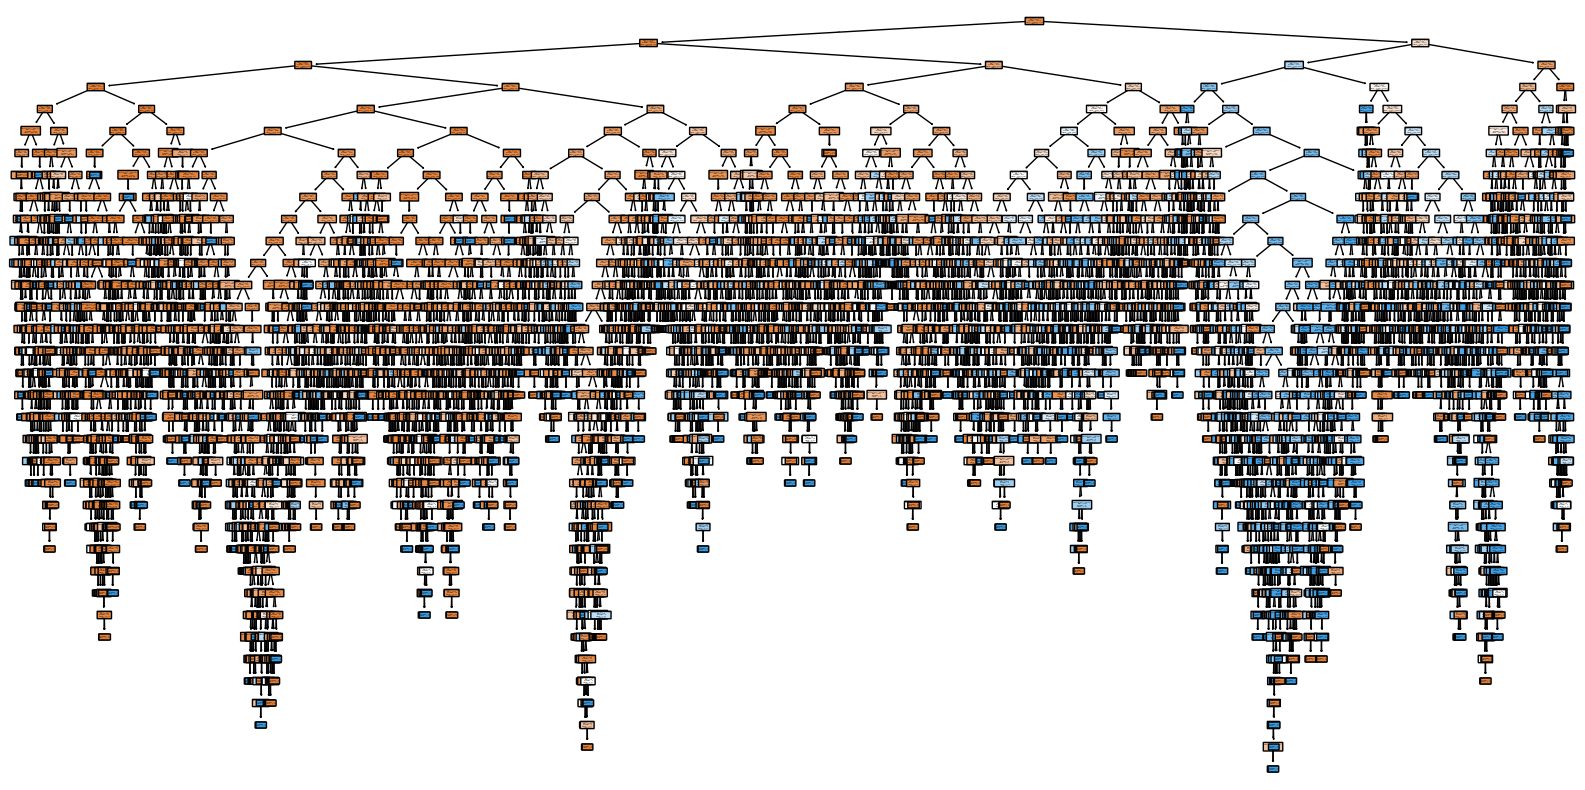

In [ ]:
class_names_str = [str(x) for x in y.unique()]

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names_str, rounded=True)
plt.show()

<p style="font-size: 16px;"> Cada nodo representa una decisión basada en el valor de una característica específica, y el proceso continúa hasta llegar a las hojas (nodos finales) que indican la clase predicha
    
<p style="font-size: 16px;">
El valor de gini en cada nodo muestra el índice de Gini, que mide la impureza. Valores de Gini más bajos indican mayor pureza en la distribución de clases en ese nodo. 0 <= gini <= 1
    
<p style="font-size: 16px;">
Este árbol es capaz de clasificar las muestras con alta pureza en las hojas, donde el índice de Gini es 0 en la mayoría de los casos, lo que indica una clara separación de clases en estos nodos finales.